In [43]:
import re
import pandas as pd
%pip install emoji
import emoji

# Load chat data
with open("WhatsApp Chat with IITH '25.txt", 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

print(len(chat_data))
print(chat_data[22])

Note: you may need to restart the kernel to use updated packages.
8361
10/3/22, 11:16 AM - +91 75698 36515: Happy Birthday @918777875738 🎉🎂🥳




[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
# Define regular expressions to match different types of messages
pattern = re.compile(r'^(\d+/\d+/\d+, \d+:\d+\s*[A|P]M)\s-\s(.+):\s(.+)$')
link_pattern = re.compile(r'^(\d+/\d+/\d+, \d+:\d+\s*[A|P]M)\s-\s(.+?):\s?(https?://\S+)')
image_pattern = re.compile(r'\<Media omitted\>')
group_notification_pattern = re.compile(r'^(\d+/\d+/\d+, \d+:\d+\s*[A|P]M)\s-\s(.+?)(?::\s)?(.+)?$')

# Parse chat data into different categories
messages = []
links = []
links2 = []
images = []
senders = []
date_times = []
message_type = []

for line in chat_data:
    if pattern.match(line):
        message = pattern.match(line).groups()
        if "<Media omitted>" in message:
            message_type.append("image")
        elif "This message was deleted" in line:
            message_type.append("notification")
        elif "Missed voice call" in line:
            message_type.append("notification")
        else:
            message_type.append("text")
        date_times.append(message[0])
        senders.append(message[1])
        messages.append(message[2])
    elif group_notification_pattern.match(line):
        message = group_notification_pattern.match(line).groups()
        date_times.append(message[0])
        senders.append('group notificaton')
        messages.append(message[1] + message[2])
        message_type.append('notification')
    if link_pattern.search(line):
        link = link_pattern.search(line).groups()
        date_times.append(link[0])
        senders.append(link[1])
        links.append(link[2])
        messages.append(link[2])
        message_type.append("link")
    if image_pattern.search(line):
        images.append(image_pattern.search(line).group())



# Print the total number of messages, links, and images
print(f'Total Messages: {len(messages)}')
print(f'Total Links: {len(links)}')
print(f'Total Images: {len(images)}')
print(len(message_type))
print(type(message_type))
# unique=message_type.unique()
# print(unique)
print(set(message_type))

Total Messages: 6666
Total Links: 83
Total Images: 924
6666
<class 'list'>
{'notification', 'text', 'link', 'image'}


In [45]:
chat_df = pd.DataFrame({'message_date': date_times ,'senders': senders, 'message':messages, 'message_type':message_type})
chat_df[chat_df["message_type"] == "image"]

,message_date,senders,message,message_type
82,"10/3/22, 6:21 PM",+91 77028 67704,<Media omitted>,image
89,"10/3/22, 7:31 PM",Saunam Halder IC,<Media omitted>,image
92,"10/3/22, 11:09 PM",+91 6303 497 076,<Media omitted>,image
261,"10/6/22, 12:33 PM",Geetha Bhavana Msme,<Media omitted>,image
262,"10/6/22, 12:33 PM",Geetha Bhavana Msme,<Media omitted>,image
...,...,...,...,...
6649,"4/13/23, 5:20 PM",+91 87919 46099,<Media omitted>,image
6650,"4/13/23, 5:20 PM",+91 87919 46099,<Media omitted>,image
6661,"4/14/23, 1:34 AM",Pragya Ch 21,<Media omitted>,image
6664,"4/14/23, 2:51 AM",+91 82100 44244,<Media omitted>,image


In [46]:
# Convert message_date datatype to "datetime" datatype
chat_df["message_date"] = pd.to_datetime(chat_df["message_date"])
chat_df.rename(columns={'message_date':'date'}, inplace=True)
chat_df

C:\Users\ankit\AppData\Local\Temp\ipykernel_14312\3131681974.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chat_df["message_date"] = pd.to_datetime(chat_df["message_date"])


,date,senders,message,message_type
0,2022-10-03 08:09:00,group notificaton,Messages and calls are end-to-end encrypted. N...,notification
1,2022-10-03 08:11:00,+91 81258 65096,Happy Birthday @919392173797 🥳🎂🎈🍰🎉🎊🎁,text
2,2022-10-03 08:20:00,Manoj Kumar ES,Wish you many more happy returns of the day @9...,text
3,2022-10-03 08:48:00,Sri Charan,Happy Birthday @919392173797 🥳🥳,text
4,2022-10-03 09:03:00,Avaneesh ES,Happy birthday @919392173797 🥳🥳,text
...,...,...,...,...
6661,2023-04-14 01:34:00,Pragya Ch 21,<Media omitted>,image
6662,2023-04-14 01:34:00,Pragya Ch 21,Happy Birthday @919673332940 !! 🎊✨,text
6663,2023-04-14 02:35:00,Akshat Jain(Civil),Happy birthday @919673332940,text
6664,2023-04-14 02:51:00,+91 82100 44244,<Media omitted>,image


In [47]:
chat_df['year'] = chat_df['date'].dt.year
chat_df['month'] = chat_df['date'].dt.month_name()
chat_df['day'] = chat_df['date'].dt.day
chat_df['hour'] = chat_df['date'].dt.hour
chat_df['minute'] = chat_df['date'].dt.minute
chat_df

,date,senders,message,message_type,year,month,day,hour,minute
0,2022-10-03 08:09:00,group notificaton,Messages and calls are end-to-end encrypted. N...,notification,2022,October,3,8,9
1,2022-10-03 08:11:00,+91 81258 65096,Happy Birthday @919392173797 🥳🎂🎈🍰🎉🎊🎁,text,2022,October,3,8,11
2,2022-10-03 08:20:00,Manoj Kumar ES,Wish you many more happy returns of the day @9...,text,2022,October,3,8,20
3,2022-10-03 08:48:00,Sri Charan,Happy Birthday @919392173797 🥳🥳,text,2022,October,3,8,48
4,2022-10-03 09:03:00,Avaneesh ES,Happy birthday @919392173797 🥳🥳,text,2022,October,3,9,3
...,...,...,...,...,...,...,...,...,...
6661,2023-04-14 01:34:00,Pragya Ch 21,<Media omitted>,image,2023,April,14,1,34
6662,2023-04-14 01:34:00,Pragya Ch 21,Happy Birthday @919673332940 !! 🎊✨,text,2023,April,14,1,34
6663,2023-04-14 02:35:00,Akshat Jain(Civil),Happy birthday @919673332940,text,2023,April,14,2,35
6664,2023-04-14 02:51:00,+91 82100 44244,<Media omitted>,image,2023,April,14,2,51


In [48]:
num_messages = len(chat_df)
num_media = len(chat_df[chat_df["message_type"] == "image"])
num_links = len(chat_df[chat_df["message_type"] == "link"])
# num_messages
num_media

924

In [49]:
words = []
for message in chat_df['message']:
    words.extend(message.split())
    
print(len(words))
print(type(words))
print(words[0])

29366
<class 'list'>
Messages


In [50]:
## Busiest user ###
# Messages sent by each user
messages_by_user = chat_df['senders'].value_counts()
# Most active user
# most_active_user = max(messages_by_user, key=messages_by_user.get)
print(messages_by_user)
top5 = messages_by_user.head()

senders
Abhay IITH                                   228
+91 70430 11241                              226
Saunam Halder IC                             184
+91 77380 50673                              124
+91 79897 66278                              106
                                            ... 
+91 6281 027 941                               1
+91 88671 61204                                1
+91 79726 53624: Final stage of evolution      1
+91 92842 62028: My brain                      1
+91 75060 72760                                1
Name: count, Length: 385, dtype: int64


In [51]:
top5

senders
Abhay IITH          228
+91 70430 11241     226
Saunam Halder IC    184
+91 77380 50673     124
+91 79897 66278     106
Name: count, dtype: int64

Text(0, 0.5, 'User ->')

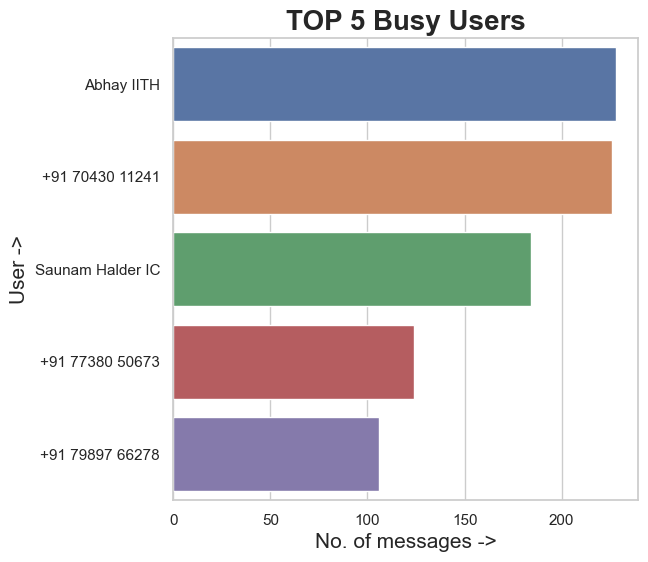

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

sns.set_theme(style="whitegrid")
font_prop = font_manager.FontProperties(size=15)

f, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x=top5.values, y=top5.index).set_title("TOP 5 Busy Users", fontdict={'size':20, 'weight':'bold'})
plt.rc('axes', labelsize=30)    
plt.xlabel("No. of messages ->", fontproperties=font_prop)
plt.ylabel("User ->", fontproperties=font_prop)


In [53]:
percent_messages_by_user = 100*(messages_by_user)/chat_df.shape[0]
p = round(percent_messages_by_user, 2)
p_D = pd.DataFrame({'User':p.index, 'percentage':p.values})
p_D

,User,percentage
0,Abhay IITH,3.42
1,+91 70430 11241,3.39
2,Saunam Halder IC,2.76
3,+91 77380 50673,1.86
4,+91 79897 66278,1.59
...,...,...
380,+91 6281 027 941,0.02
381,+91 88671 61204,0.02
382,+91 79726 53624: Final stage of evolution,0.02
383,+91 92842 62028: My brain,0.02


<class 'pandas.core.frame.DataFrame'>
          freq
happy     3548
birthday  3398
🥳🥳         605
🥳🥳🥳        165
🥳          115
🥳🎉         114
🎉🎉         112
hbd        103
!!          93
day         81
🥳🎂🥳🎂🥳🎂      77
wish        74
returns     74
🎉🎉🎂🎂🥳🥳🎁🎁    69
✨🎊          60
🥳🥳🎂         59
🥳🥳✨✨        57
🎂🎂🎉🎉        49
🎉🥳          49
🎊           47


<Axes: >

C:\Python3114\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from current font.
  func(*args, **kwargs)
C:\Python3114\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  func(*args, **kwargs)
C:\Python3114\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from current font.
  func(*args, **kwargs)
C:\Python3114\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 127873 (\N{WRAPPED PRESENT}) missing from current font.
  func(*args, **kwargs)
C:\Python3114\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  func(*args, **kwargs)
C:\Python3114\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 127882 (\N{CONFETTI BALL}) missing from current font.
  func(*args, **kwargs)
C:\Python3114\Lib\site-packages\IPython\core\pyl

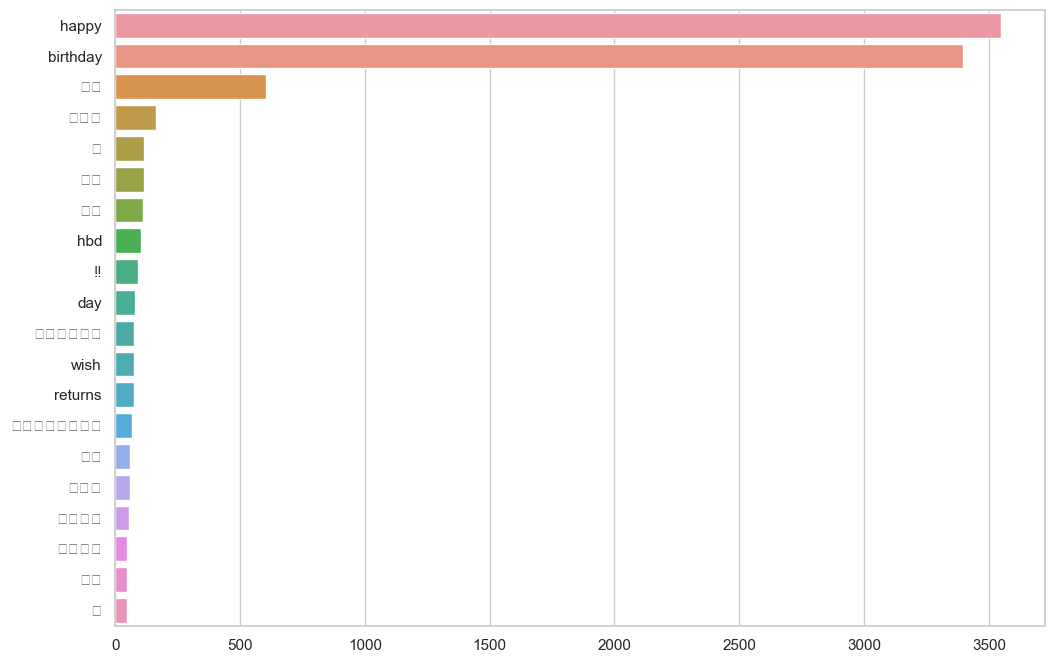

In [54]:
## Most used words in the group
# remove group notifications
# remove media ommited messages, and links.
# remove stopwords
import itertools

temp_df = chat_df[chat_df['message_type'] == "text"]
f = open('hinglish_stopwords.txt', 'r')
stop_words = f.read()
stop_words += "message"

words = []
for message in temp_df['message']:
    for word in message.lower().split():
        if word not in stop_words:
            if '@' not in word:
                words.append(word)


freq = {}
for word in words:
    if word in freq:
        freq[word] += 1
    else:
        freq[word] = 1

topwords = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
top20 = dict(itertools.islice(topwords.items(), 20))
top20
# Create dataframe from first 20 entries of the dictionary
topwords_df = pd.DataFrame.from_dict(top20, orient='index')
topwords_df.columns=['freq']   
# topwords_df
print(type(topwords_df))
print(topwords_df)
# top20_to_30 = dict(itertools.islice(topwords.items(), 20, 30))
# print(top20_to_30)


# plt.rcParams['font.family'] = ['Noto Color Emoji']

#plt.rcParams['font.Arial'] = ['Noto Color Emoji']
#plt.rcParams['font.family'] = 'Arial'
sns.barplot(x=topwords_df.values.flatten(), y=topwords_df.index)
# topwords_df.index
# topwords_df.values.flatten()


In [55]:
group_notification_pattern = re.compile(r'^(\d+/\d+/\d+, \d+:\d+\s*[A|P]M)\s-\s(.+?)(?::\s)?(.+)?$')
line = "10/3/22, 8:09 AM : This message was deleted"

if group_notification_pattern.match(line):
    message = group_notification_pattern.match(line).groups()
    date_times.append(message[0])
    senders.append('group notificaton')
    messages.append(message[1] + message[2])
    message_type.append('notification')

message

'Happy birthday @919673332940 '

In [56]:
import matplotlib.font_manager as fm

# # download 'Noto Color Emoji' font
# !wget "https://github.com/googlefonts/noto-emoji/raw/main/fonts/NotoColorEmoji.ttf"

# # install 'Noto Color Emoji' font
# fm.fontManager.addfont('NotoColorEmoji.ttf')

# # check if 'Noto Color Emoji' is now available
# if 'Noto Color Emoji' not in [f.name for f in fm.fontManager.ttflist()]:
#     print("'Noto Color Emoji' could not be installed.")
# else:
#     print("'Noto Color Emoji' has been successfully installed.")


In [57]:
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)


chat_df['emojis'] = chat_df['message'].apply(extract_emojis)

In [58]:
emoji_series = chat_df['emojis'].value_counts()
emoji_series


emojis
        3000
🥳🥳       616
🥳🥳🥳      166
🥳        116
🥳🎉       115
        ... 
🎉🎉🎈🎈       1
❤❤         1
🥰          1
🎊🎉🎊🎉       1
💫          1
Name: count, Length: 798, dtype: int64

In [59]:
emoji_df = pd.DataFrame({'emoji':emoji_series.index, 'count':emoji_series.values})
emoji_df.drop(index=0)


,emoji,count
1,🥳🥳,616
2,🥳🥳🥳,166
3,🥳,116
4,🥳🎉,115
5,🎉🎉,114
...,...,...
793,🎉🎉🎈🎈,1
794,❤❤,1
795,🥰,1
796,🎊🎉🎊🎉,1


C:\Python3114\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python3114\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


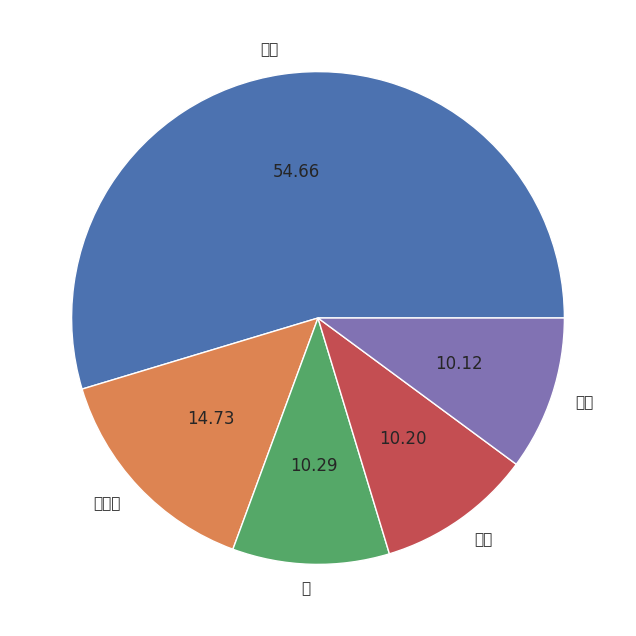

In [60]:
import numpy as np
from matplotlib import font_manager
import matplotlib.pyplot as plt
# y = np.array([35, 25, 25, 15])
# mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
font_path = font_manager.findfont(font_manager.FontProperties(family=['Noto Color Emoji']))
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()
y = emoji_df.drop(index=0).head()['count'].values
mylabels = emoji_df.drop(index=0).head()['emoji'].values


plt.pie(y, labels = mylabels, autopct='%0.2f')
plt.show() 


In [61]:
# import matplotlib.pyplot as plt
# from matplotlib import font_manager

# # Specify the font family to use for the plot
# font_path = font_manager.findfont(font_manager.FontProperties(family=['Noto Color Emoji']))
# plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()
# # plt.rcParams['font.family'] = 'Apple Color Emoji'
# # Define the data for the bar plot
# x = ['🍎', '🍊', '🍌', '🍇', '🍉']
# y = [10, 8, 6, 4, 2]

# # Create the bar plot
# fig, ax = plt.subplots()
# ax.bar(x, y)

# # Add labels to the plot
# ax.set_xlabel('Fruit')
# ax.set_ylabel('Quantity')
# ax.set_title('Top 5 Fruits')

# # Show the plot
# plt.show()


In [62]:
# Time analysis
chat_df

,date,senders,message,message_type,year,month,day,hour,minute,emojis
0,2022-10-03 08:09:00,group notificaton,Messages and calls are end-to-end encrypted. N...,notification,2022,October,3,8,9,
1,2022-10-03 08:11:00,+91 81258 65096,Happy Birthday @919392173797 🥳🎂🎈🍰🎉🎊🎁,text,2022,October,3,8,11,🥳🎂🎈🍰🎉🎊🎁
2,2022-10-03 08:20:00,Manoj Kumar ES,Wish you many more happy returns of the day @9...,text,2022,October,3,8,20,🎉🎉🎂🎂🥳🥳🎁🎁
3,2022-10-03 08:48:00,Sri Charan,Happy Birthday @919392173797 🥳🥳,text,2022,October,3,8,48,🥳🥳
4,2022-10-03 09:03:00,Avaneesh ES,Happy birthday @919392173797 🥳🥳,text,2022,October,3,9,3,🥳🥳
...,...,...,...,...,...,...,...,...,...,...
6661,2023-04-14 01:34:00,Pragya Ch 21,<Media omitted>,image,2023,April,14,1,34,
6662,2023-04-14 01:34:00,Pragya Ch 21,Happy Birthday @919673332940 !! 🎊✨,text,2023,April,14,1,34,🎊✨
6663,2023-04-14 02:35:00,Akshat Jain(Civil),Happy birthday @919673332940,text,2023,April,14,2,35,
6664,2023-04-14 02:51:00,+91 82100 44244,<Media omitted>,image,2023,April,14,2,51,


In [63]:
# Change dataframe according to selected users
# LINEPLOT : Year Month VS # messages
chat_df['year_month'] = chat_df.apply(lambda row: str(row.year) + '_' + row.month[:3], axis=1)
chat_series = chat_df.groupby(['year_month'])['message'].count()
chat_series


year_month
2022_Dec    1020
2022_Nov    1143
2022_Oct    1675
2023_Apr     864
2023_Feb     738
2023_Jan     786
2023_Mar     440
Name: message, dtype: int64

In [64]:
temp_df = chat_series.to_frame()
temp_df

,message
year_month,
2022_Dec,1020
2022_Nov,1143
2022_Oct,1675
2023_Apr,864
2023_Feb,738
2023_Jan,786
2023_Mar,440


In [65]:
# temp_df.reset_index(level=, drop=True)

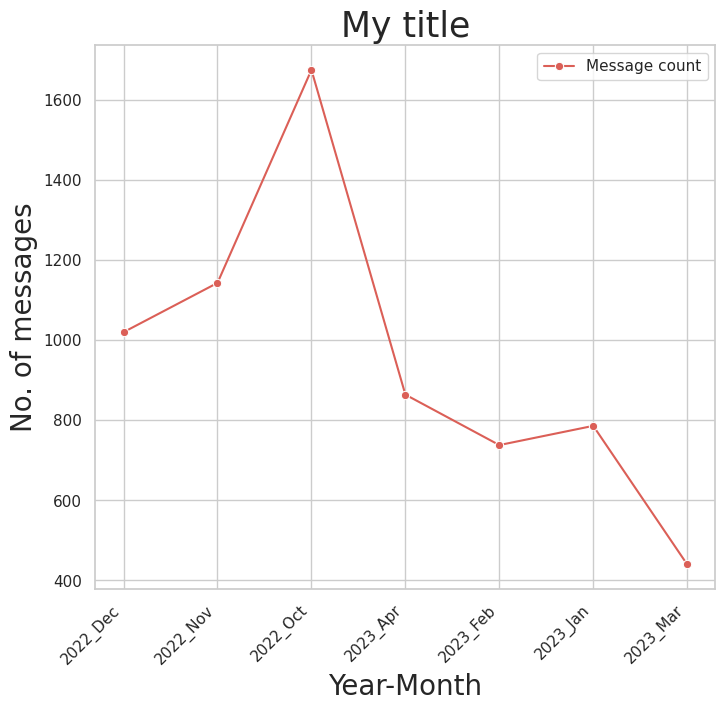

In [66]:
f, ax = plt.subplots(figsize=(8, 8))
sns.set_palette("hls", 8)
sns.lineplot(temp_df, markers=True)
f.autofmt_xdate(rotation=45)
ax.set_xlabel("Year-Month", size = 20)
ax.set_ylabel("No. of messages", size = 20)
ax.set_title('My title', size = 25)
ax.legend(["Message count"])


In [67]:
# chat_df


In [68]:
chat_df.drop('year_month', inplace=True, axis=1)

In [69]:
chat_df

,date,senders,message,message_type,year,month,day,hour,minute,emojis
0,2022-10-03 08:09:00,group notificaton,Messages and calls are end-to-end encrypted. N...,notification,2022,October,3,8,9,
1,2022-10-03 08:11:00,+91 81258 65096,Happy Birthday @919392173797 🥳🎂🎈🍰🎉🎊🎁,text,2022,October,3,8,11,🥳🎂🎈🍰🎉🎊🎁
2,2022-10-03 08:20:00,Manoj Kumar ES,Wish you many more happy returns of the day @9...,text,2022,October,3,8,20,🎉🎉🎂🎂🥳🥳🎁🎁
3,2022-10-03 08:48:00,Sri Charan,Happy Birthday @919392173797 🥳🥳,text,2022,October,3,8,48,🥳🥳
4,2022-10-03 09:03:00,Avaneesh ES,Happy birthday @919392173797 🥳🥳,text,2022,October,3,9,3,🥳🥳
...,...,...,...,...,...,...,...,...,...,...
6661,2023-04-14 01:34:00,Pragya Ch 21,<Media omitted>,image,2023,April,14,1,34,
6662,2023-04-14 01:34:00,Pragya Ch 21,Happy Birthday @919673332940 !! 🎊✨,text,2023,April,14,1,34,🎊✨
6663,2023-04-14 02:35:00,Akshat Jain(Civil),Happy birthday @919673332940,text,2023,April,14,2,35,
6664,2023-04-14 02:51:00,+91 82100 44244,<Media omitted>,image,2023,April,14,2,51,


In [70]:
chat_df['only_date'] = chat_df['date'].dt.date

In [71]:
chat_df

,date,senders,message,message_type,year,month,day,hour,minute,emojis,only_date
0,2022-10-03 08:09:00,group notificaton,Messages and calls are end-to-end encrypted. N...,notification,2022,October,3,8,9,,2022-10-03
1,2022-10-03 08:11:00,+91 81258 65096,Happy Birthday @919392173797 🥳🎂🎈🍰🎉🎊🎁,text,2022,October,3,8,11,🥳🎂🎈🍰🎉🎊🎁,2022-10-03
2,2022-10-03 08:20:00,Manoj Kumar ES,Wish you many more happy returns of the day @9...,text,2022,October,3,8,20,🎉🎉🎂🎂🥳🥳🎁🎁,2022-10-03
3,2022-10-03 08:48:00,Sri Charan,Happy Birthday @919392173797 🥳🥳,text,2022,October,3,8,48,🥳🥳,2022-10-03
4,2022-10-03 09:03:00,Avaneesh ES,Happy birthday @919392173797 🥳🥳,text,2022,October,3,9,3,🥳🥳,2022-10-03
...,...,...,...,...,...,...,...,...,...,...,...
6661,2023-04-14 01:34:00,Pragya Ch 21,<Media omitted>,image,2023,April,14,1,34,,2023-04-14
6662,2023-04-14 01:34:00,Pragya Ch 21,Happy Birthday @919673332940 !! 🎊✨,text,2023,April,14,1,34,🎊✨,2023-04-14
6663,2023-04-14 02:35:00,Akshat Jain(Civil),Happy birthday @919673332940,text,2023,April,14,2,35,,2023-04-14
6664,2023-04-14 02:51:00,+91 82100 44244,<Media omitted>,image,2023,April,14,2,51,,2023-04-14


In [72]:
chat_df['day_name'] = chat_df['date'].dt.day_name()
ws = chat_df['day_name'].value_counts()

In [73]:
ws.to_frame()

,count
day_name,
Sunday,1198
Monday,1055
Tuesday,1037
Wednesday,894
Friday,893
Saturday,805
Thursday,784


In [74]:
# Create a pivot table to count the number of messages sent by each member on each day and hour
pivot = pd.pivot_table(chat_df, index='day_name', columns='hour', values='message', aggfunc='count')

In [75]:
pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,154,68,19,3,2,1,10,32,43,85,...,20,36,8,24,20,31,12,8,59,34
Monday,173,59,22,6,6,2,12,49,95,60,...,24,35,34,58,72,34,19,28,46,22
Saturday,123,47,24,4,2,2,13,26,30,55,...,48,45,28,28,18,20,15,53,23,17
Sunday,189,99,10,9,2,3,17,46,45,57,...,40,31,33,74,10,32,13,27,30,16
Thursday,187,52,24,10,7,1,23,39,52,52,...,16,10,21,28,11,5,18,36,37,13
Tuesday,186,53,35,25,3,5,19,42,59,75,...,45,12,41,42,56,44,24,39,23,23
Wednesday,161,48,14,7,2,5,13,41,58,70,...,22,48,18,40,19,24,20,40,27,19


<Axes: xlabel='hour', ylabel='day_name'>

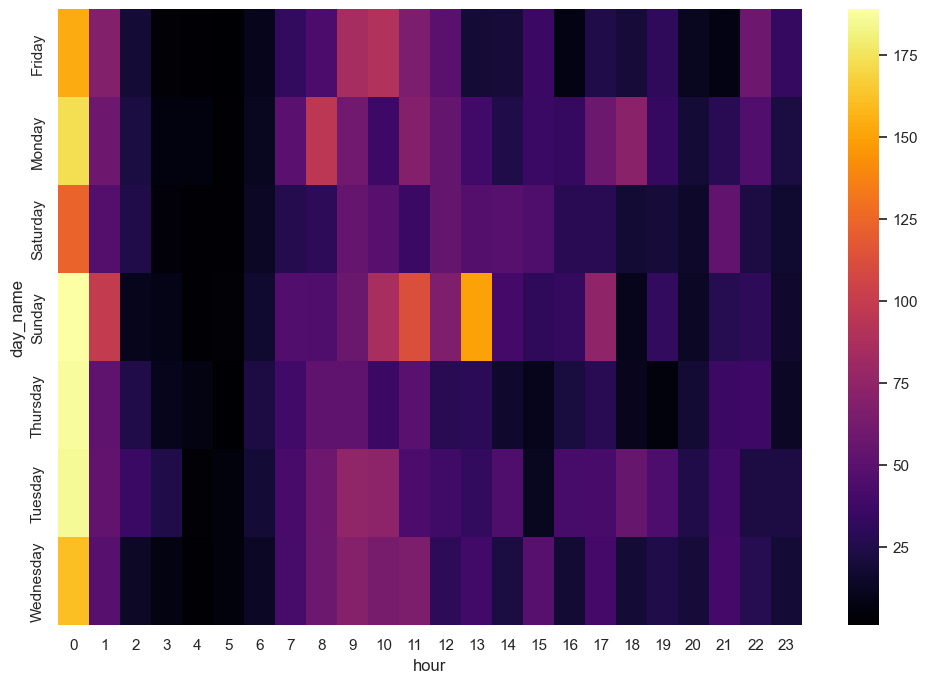

In [76]:
# Create a heatmap to visualize the pivot table
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(pivot, cmap='inferno', fmt='.0f')

<Axes: xlabel='hour', ylabel='day_name'>

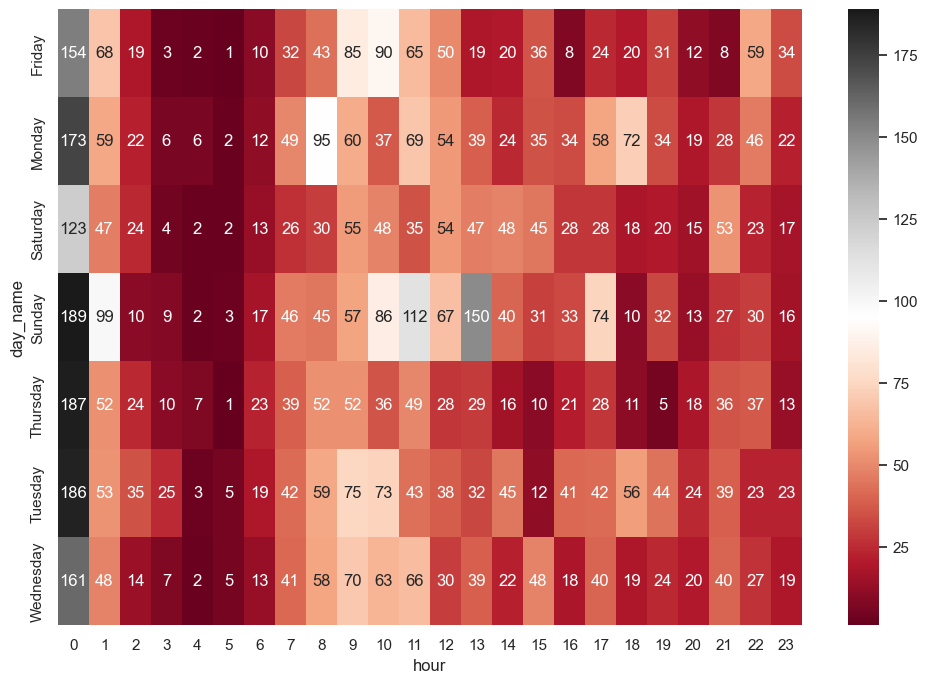

In [77]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(pivot, cmap='RdGy', annot=True, fmt='.0f')

In [78]:
chat_df['period'] = chat_df.apply(lambda row: str(row.hour) + '-' + str(row.hour + 1) , axis=1)

In [79]:
chat_df

,date,senders,message,message_type,year,month,day,hour,minute,emojis,only_date,day_name,period
0,2022-10-03 08:09:00,group notificaton,Messages and calls are end-to-end encrypted. N...,notification,2022,October,3,8,9,,2022-10-03,Monday,8-9
1,2022-10-03 08:11:00,+91 81258 65096,Happy Birthday @919392173797 🥳🎂🎈🍰🎉🎊🎁,text,2022,October,3,8,11,🥳🎂🎈🍰🎉🎊🎁,2022-10-03,Monday,8-9
2,2022-10-03 08:20:00,Manoj Kumar ES,Wish you many more happy returns of the day @9...,text,2022,October,3,8,20,🎉🎉🎂🎂🥳🥳🎁🎁,2022-10-03,Monday,8-9
3,2022-10-03 08:48:00,Sri Charan,Happy Birthday @919392173797 🥳🥳,text,2022,October,3,8,48,🥳🥳,2022-10-03,Monday,8-9
4,2022-10-03 09:03:00,Avaneesh ES,Happy birthday @919392173797 🥳🥳,text,2022,October,3,9,3,🥳🥳,2022-10-03,Monday,9-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6661,2023-04-14 01:34:00,Pragya Ch 21,<Media omitted>,image,2023,April,14,1,34,,2023-04-14,Friday,1-2
6662,2023-04-14 01:34:00,Pragya Ch 21,Happy Birthday @919673332940 !! 🎊✨,text,2023,April,14,1,34,🎊✨,2023-04-14,Friday,1-2
6663,2023-04-14 02:35:00,Akshat Jain(Civil),Happy birthday @919673332940,text,2023,April,14,2,35,,2023-04-14,Friday,2-3
6664,2023-04-14 02:51:00,+91 82100 44244,<Media omitted>,image,2023,April,14,2,51,,2023-04-14,Friday,2-3


In [80]:
pivot = pd.pivot_table(chat_df, index='day_name', columns='period', values='message', aggfunc='count').fillna(0)


In [81]:
pivot

period,0-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-24,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,154,68,90,65,50,19,20,36,8,24,...,8,59,34,3,2,1,10,32,43,85
Monday,173,59,37,69,54,39,24,35,34,58,...,28,46,22,6,6,2,12,49,95,60
Saturday,123,47,48,35,54,47,48,45,28,28,...,53,23,17,4,2,2,13,26,30,55
Sunday,189,99,86,112,67,150,40,31,33,74,...,27,30,16,9,2,3,17,46,45,57
Thursday,187,52,36,49,28,29,16,10,21,28,...,36,37,13,10,7,1,23,39,52,52
Tuesday,186,53,73,43,38,32,45,12,41,42,...,39,23,23,25,3,5,19,42,59,75
Wednesday,161,48,63,66,30,39,22,48,18,40,...,40,27,19,7,2,5,13,41,58,70


In [82]:
column_order = sorted(pivot.columns, key=lambda x: int(x.split('-')[0]))

In [83]:
pivot = pivot[column_order]
pivot

period,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,...,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,154,68,19,3,2,1,10,32,43,85,...,20,36,8,24,20,31,12,8,59,34
Monday,173,59,22,6,6,2,12,49,95,60,...,24,35,34,58,72,34,19,28,46,22
Saturday,123,47,24,4,2,2,13,26,30,55,...,48,45,28,28,18,20,15,53,23,17
Sunday,189,99,10,9,2,3,17,46,45,57,...,40,31,33,74,10,32,13,27,30,16
Thursday,187,52,24,10,7,1,23,39,52,52,...,16,10,21,28,11,5,18,36,37,13
Tuesday,186,53,35,25,3,5,19,42,59,75,...,45,12,41,42,56,44,24,39,23,23
Wednesday,161,48,14,7,2,5,13,41,58,70,...,22,48,18,40,19,24,20,40,27,19


In [84]:
# Say I have two unique values in the sender column i want to create a new column based on the sender i.e if sender is A , then reciever is B and vice versa

# df = chat_df
# # df['reciever'] = 


# # group the DataFrame by sender
# sender_grouped = df.groupby('senders')

# # create a new DataFrame to store the average response times
# response_times = pd.DataFrame(columns=['senders', 'receiver', 'Average Response Time'])

# # iterate through each sender
# for sender, group in sender_grouped:
#     # iterate through each receiver
#     for receiver in group['Receiver'].unique():
#         # filter the DataFrame to only contain messages between the sender and receiver
#         filtered_df = group[group['Receiver'] == receiver].sort_values(by='Date')
#         # calculate the time difference between each message
#         time_diffs = filtered_df['Date'].diff().iloc[1:]
#         # calculate the average response time
#         avg_response_time = time_diffs.mean()
#         # add the results to the response_times DataFrame
#         response_times = response_times.append({'Sender': sender, 'Receiver': receiver, 'Average Response Time': avg_response_time}, ignore_index=True)

# # display the results
# print(response_times)